1

In [34]:
def train(con,tar):
    for i, val in enumerate(tar):
        if val.lower()=='yes':
            specific_h=con[i].copy()
            break

    for i, val in enumerate(con):
        if tar[i].lower()=='yes':
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x]='?'
                else:
                    pass
    return specific_h


concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]

target = ['yes', 'yes', 'no', 'yes']

s_final= train(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")

Final Specific_h: 
['Sunny', 'Warm', '?', 'Strong', '?', '?']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


2

In [28]:
import pandas as pd
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df=pd.read_csv("MEL-lab2.csv")

concepts=np.array(df)[:,:-1]
target=np.array(df)[:,-1]
print("\nInstances are:\n", concepts)
print("\nTarget Values are: ", target)

In [31]:
def learn(concepts, target):
    positive_instances = [concepts[i] for i in range(len(concepts)) if target[i] == 'yes']
    specific_h = positive_instances[0].copy()
    print("\nInitialization of specific_h and generic_h")
    print("\nSpecific Boundary: ", specific_h)

    # Fix the initialization of general_h
    general_h = [['?' for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print("\nGeneric Boundary: ", general_h)

    for i, h in enumerate(concepts):
        print("\nInstance", i + 1, "is ", h)
        if target[i] == "yes":
            print("Instance is Positive ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'

        if target[i] == "no":
            print("Instance is Negative ")
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x] if general_h[x][x] == '?' else general_h[x][x]
                else:
                    general_h[x][x] = '?' if general_h[x][x] == '?' else general_h[x][x]

        print("Specific Boundary after ", i + 1, "Instance is ", specific_h)
        print("Generic Boundary after ", i + 1, "Instance is ", general_h)
        print("\n")

    # Clean up the redundant hypotheses in the generic boundary
    indices = [i for i, val in enumerate(general_h) if val == ['?' for _ in range(len(specific_h))]]
    for i in indices:
        general_h.remove(['?' for _ in range(len(specific_h))])
    return specific_h, general_h

concepts = [
    ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same'],
    ['Rainy', 'Cold', 'High', 'Strong', 'Warm', 'Change'],
    ['Sunny', 'Warm', 'High', 'Strong', 'Cool', 'Change']
]

target = ['yes', 'yes', 'no', 'yes']

s_final, g_final = learn(concepts, target)

print("Final Specific_h: ", s_final, sep="\n")
print("Final Generic_h: ", g_final, sep="\n")


Initialization of specific_h and generic_h

Specific Boundary:  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']

Generic Boundary:  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Instance 1 is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  1 Instance is  ['Sunny', 'Warm', 'Normal', 'Strong', 'Warm', 'Same']
Generic Boundary after  1 Instance is  [['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]



Instance 2 is  ['Sunny', 'Warm', 'High', 'Strong', 'Warm', 'Same']
Instance is Positive 
Specific Boundary after  2 Instance is  ['Sunny', 'Warm', '?', 'Strong', 'Warm', 'Same']
Generic Boundary after  2 Instance is  [['?', '?', '?', '?', '?', '?'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 1.0
Decision Tree Rules:
 |--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |  

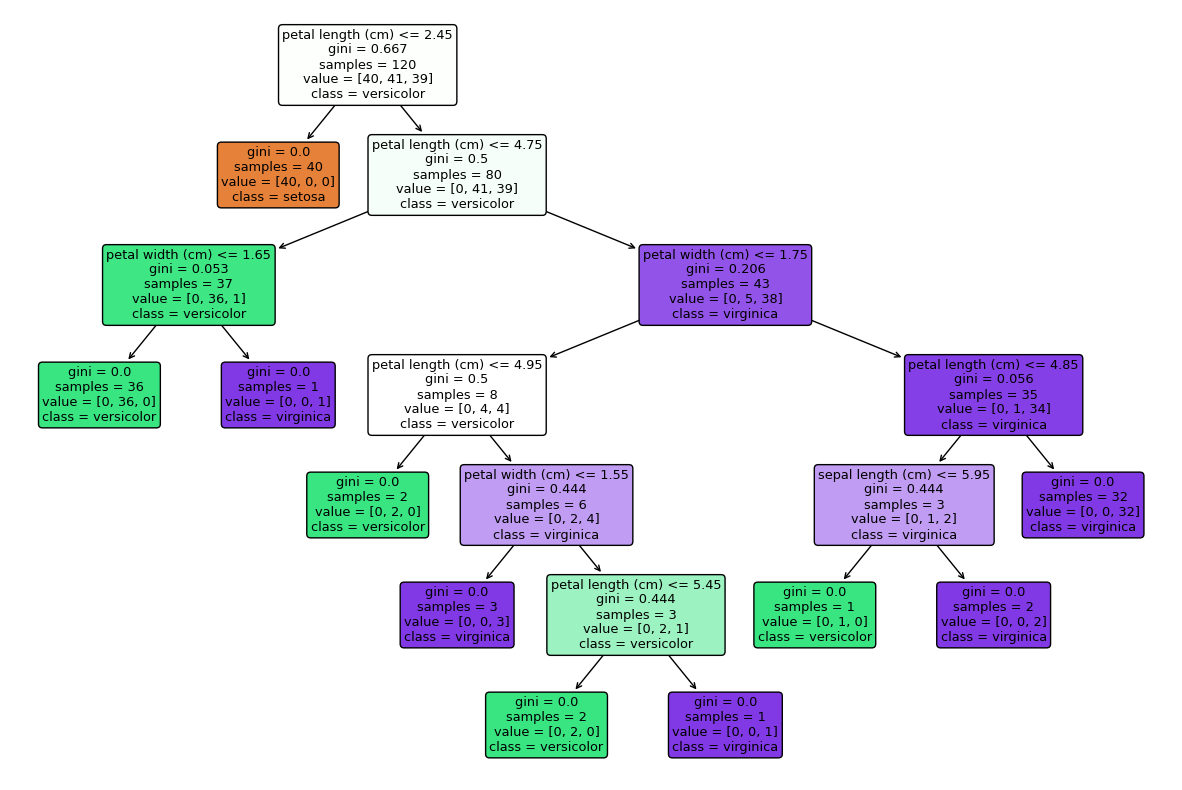

Prediction for new sample: setosa


In [32]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Visualize the decision tree
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("Decision Tree Rules:\n", tree_rules)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# Now, you can use the trained classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = clf.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")

4

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear')  # Use 'linear' kernel for simplicity

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Now, you can use the trained SVM classifier to classify a new sample
new_sample = [[5.1, 3.5, 1.4, 0.2]]  # Replace this with your own values
prediction = svm_classifier.predict(new_sample)
print(f"Prediction for new sample: {iris.target_names[prediction[0]]}")

5

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-Nearest Neighbors Classifier with k=3 (you can adjust k as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=3)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Print correct and wrong predictions
correct_predictions = 0
wrong_predictions = 0

for i in range(len(y_test)):
    actual_class = iris.target_names[y_test[i]]
    predicted_class = iris.target_names[y_pred[i]]
    if actual_class == predicted_class:
        correct_predictions += 1
    else:
        wrong_predictions += 1
    print(f"Actual: {actual_class}, Predicted: {predicted_class}")

# Print overall accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"\nOverall Accuracy: {accuracy}")

# Print number of correct and wrong predictions
print(f"Correct Predictions: {correct_predictions}")
print(f"Wrong Predictions: {wrong_predictions}")

Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: setosa, Predicted: setosa
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: versicolor, Predicted: versicolor
Actual: versicolor, Predicted: versicolor
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: setosa, Predicted: setosa
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: virginica
Actual: virginica, Predicted: 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


6. Write a program to demonstrate the working of  EM algorithm.

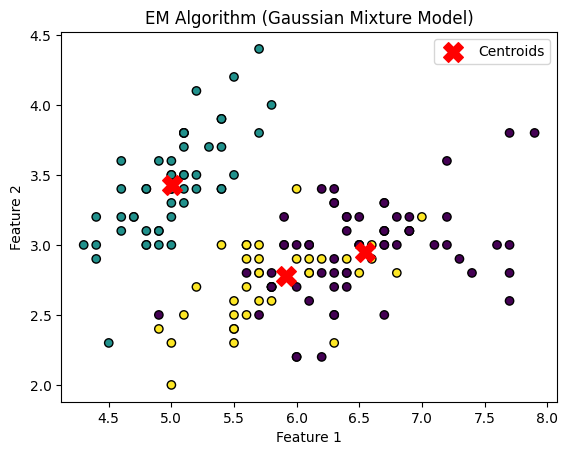

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data

# Initialize the Gaussian Mixture Model with 3 components (clusters)
gmm = GaussianMixture(n_components=3, random_state=42)

# Fit the model to the data
gmm.fit(X)

# Predict the cluster assignments for each data point
labels = gmm.predict(X)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('EM Algorithm (Gaussian Mixture Model)')
plt.legend()
plt.show()


7. Write a python program to implement Naive bayesian Classifier using any appropriate dataset.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8. Write a program to implement K means Clustering, demonstrate the working by considering appropriate dataset.

In [6]:
# importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd


In [7]:
dataset = pd.read_csv('Mall_Customers.csv')

In [8]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
dataset.shape

(200, 5)

In [10]:
x = dataset.iloc[:, [3, 4]].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

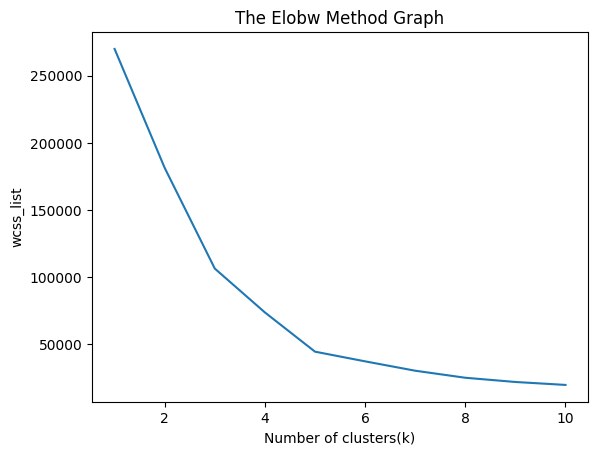

In [11]:
#finding optimal number of clusters using the elbow method
from sklearn.cluster import KMeans
wcss_list= []  #Initializing the list for the values of WCSS

#Using for loop for iterations from 1 to 10.
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)
mtp.plot(range(1, 11), wcss_list)
mtp.title('The Elobw Method Graph')
mtp.xlabel('Number of clusters(k)')
mtp.ylabel('wcss_list')
mtp.show()

In [ ]:
    #training the K-means model on a dataset
    kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)
    y_predict= kmeans.fit_predict(x)

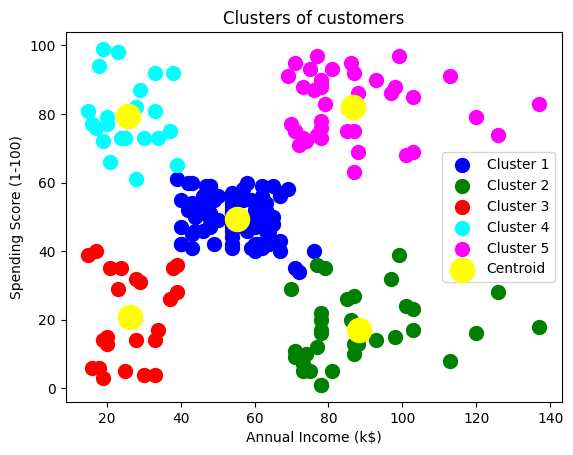

In [13]:
    #visulaizing the clusters
    mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster
    mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster
    mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster
    mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4') #for fourth cluster
    mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5') #for fifth cluster
    mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')
    mtp.title('Clusters of customers')
    mtp.xlabel('Annual Income (k$)')
    mtp.ylabel('Spending Score (1-100)')
    mtp.legend()
    mtp.show()

9. Write a program to demonstrate the working of Apriori alogirthm.

In [26]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Sample transaction data
transactions = [['bread', 'milk', 'beer'],
                ['bread', 'diapers', 'eggs'],
                ['milk', 'diapers', 'beer', 'cola'],
                ['bread', 'milk', 'diapers', 'beer'],
                ['bread', 'milk', 'eggs']]

# Transform the transaction data to a one-hot encoded format
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Print the support for each frequent itemset
print("Frequent Itemsets:")
print(frequent_itemsets[['itemsets', 'support']])

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print the confidence for each association rule
print("\nAssociation Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Frequent Itemsets:
                 itemsets  support
0                  (beer)      0.6
1                 (bread)      0.8
2               (diapers)      0.6
3                  (eggs)      0.4
4                  (milk)      0.8
5           (bread, beer)      0.4
6         (diapers, beer)      0.4
7            (milk, beer)      0.6
8        (bread, diapers)      0.4
9           (bread, eggs)      0.4
10          (bread, milk)      0.6
11        (diapers, milk)      0.4
12    (bread, milk, beer)      0.4
13  (diapers, milk, beer)      0.4

Association Rules:
       antecedents consequents  support  confidence
0           (milk)      (beer)      0.6        0.75
1           (beer)      (milk)      0.6        1.00
2           (eggs)     (bread)      0.4        1.00
3          (bread)      (milk)      0.6        0.75
4           (milk)     (bread)      0.6        0.75
5    (bread, beer)      (milk)      0.4        1.00
6  (diapers, milk)      (beer)      0.4        1.00
7  (diapers, beer)  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


10. Write a program to implement PCA by using appropriate datasets for the computation.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


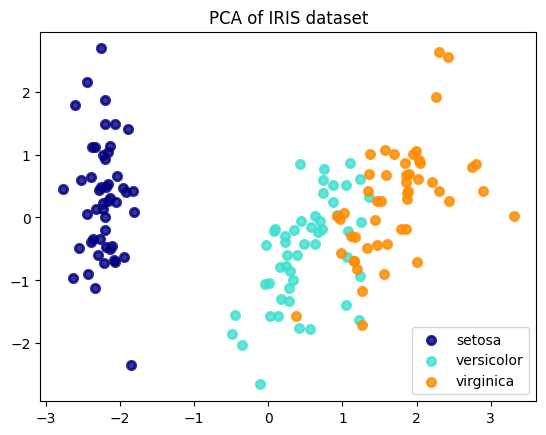

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
X_std = StandardScaler().fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot the results
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.show()